# WeatherPy
----

#### Observations

* The main question of this analysis was : "What's the weather like as we approach the equator?", and although this is obvious", it was proved throught this data analysis that the answer is : "It gets hotter"; and this can be observed and justified looking at Fig 1, Fig 5 and Fig 6, where temperature increase from negative latitudes to 0 latitude (equator); and aversely decrease as it move from the equator to the north, or positive latitudes.


* In addition to check temperature's behaviour with respect the Latitud, other variables such as Humidity, Cloudiness and Wind Speed were also analyzed, but none of them has a clear correlation versus Latitude. As it is observed from Figures 7 to 12, and even separating northen and southern hemispheres, these variables doesn't show a comprenhensive relationship with the latitude; and this can be explained because these variables are not "Directly" dependent on Latitude, but on other meteorology variables such as the same temperature and water vapor for the Humidity and Cloudiness case, and altitude and sea level for the Wind Speed case. Saying this, I'm not confirming that these three variable only depends on the previous mentioned factors, but thinking in making an extra analysis, it can help in determining better insights and trends, which helps to create better predictive models.


* Linear regressions are a good alternative to make predictions, but you must be careful of how good is the model. For this Weather Study, different regression models were generated for each one of the analyzed variables (temperature, humidity,cloudiness and wind speed) with respect Latitude.According to this, only Temperature has an acceptable model, but it's not the best if we want to use it to make predictions, taking in count that the r-squared factor is not very close to 1, which means that the variability of the temperature is not in at least a 90% explained by the Latitude.


* Even though the main question of this analysis was answered and justified. It's a very good idea to include additional charts to analyze other trends, such as Humidity vs Water Vapor, Wind Speed and Sea Level, Wind Speed and altitude, Cloudiness and precipitations, etc. This can give a better insight of how variables are correlated and what are the main patterns for each variable.  

## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


596

### Perform API Calls
* Weather check on each city using a series of successive API calls.
* Retrieving latitude, longitude, temperature and more key variables for the analysis.

In [3]:
# Base API url from OpenWeather documentation
base_url= "http://api.openweathermap.org/data/2.5/weather?"
url= f"{base_url}appid={weather_api_key}&units=imperial&q="

print(f"Beginning Data Retrieval")
print(f"---------------------------")

# Creating empty lists to store data from the API calls
set_counter=1
city_counter=1
humidity=[]
city_name=[]
lat=[]
lng=[]
max_temp = []
cloudiness = []
wind_speed = []
country= []
date=[]

# For loop to make successive API calls for each city
for city in cities:
    response_json = requests.get(url + city).json()
#Printing the proccessed city by set, including the city name
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
#City counter increased by one for each city
    city_counter+=1
# Sets of 50 cities were defined and a hold of one second between each set    
    if city_counter >= 51:
            time.sleep(1)
            city_counter=1
            set_counter+=1
#Exception in case the "random city" doesn't appear in the API.
#Appending API data to empty lists
    try: 
        humidity.append(response_json["main"]["humidity"])
        city_name.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        
    except:
        print("City not found. Skipping...")
        pass
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

        
    


Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | manta
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | labelle
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | douglas
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | skibbereen
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | faya
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | miles city
Processing Record 18 of Set 1 | thyboron
Processing Record 19 of Set 1 | shiraz
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of

Processing Record 37 of Set 4 | talnakh
Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | north bend
Processing Record 40 of Set 4 | tuatapere
Processing Record 41 of Set 4 | asfi
Processing Record 42 of Set 4 | nyurba
Processing Record 43 of Set 4 | banmo
City not found. Skipping...
Processing Record 44 of Set 4 | narathiwat
Processing Record 45 of Set 4 | doha
Processing Record 46 of Set 4 | iquique
Processing Record 47 of Set 4 | zdvinsk
Processing Record 48 of Set 4 | nata
Processing Record 49 of Set 4 | guerrero negro
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | bathsheba
Processing Record 2 of Set 5 | bulgan
Processing Record 3 of Set 5 | sayyan
Processing Record 4 of Set 5 | yar-sale
Processing Record 5 of Set 5 | santo antonio de jesus
Processing Record 6 of Set 5 | bonthe
Processing Record 7 of Set 5 | arlit
Processing Record 8 of Set 5 | chateauroux
Processing Record 9 of Set 5 | dubenskiy
City not found. Skipping...
Proce

Processing Record 25 of Set 8 | havoysund
Processing Record 26 of Set 8 | napier
Processing Record 27 of Set 8 | poum
Processing Record 28 of Set 8 | bintulu
Processing Record 29 of Set 8 | cedar city
Processing Record 30 of Set 8 | minot
Processing Record 31 of Set 8 | comodoro rivadavia
Processing Record 32 of Set 8 | padang
Processing Record 33 of Set 8 | pimentel
Processing Record 34 of Set 8 | pichayevo
Processing Record 35 of Set 8 | apiai
Processing Record 36 of Set 8 | mestec kralove
Processing Record 37 of Set 8 | porto santo
Processing Record 38 of Set 8 | solnechnyy
Processing Record 39 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 40 of Set 8 | dire
Processing Record 41 of Set 8 | ayan
Processing Record 42 of Set 8 | puri
Processing Record 43 of Set 8 | alice springs
Processing Record 44 of Set 8 | steamboat springs
Processing Record 45 of Set 8 | umarkot
Processing Record 46 of Set 8 | atchison
Processing Record 47 of Set 8 | ust-shonosha
Processing Re

Processing Record 11 of Set 12 | lagoa vermelha
Processing Record 12 of Set 12 | marv dasht
City not found. Skipping...
Processing Record 13 of Set 12 | gazli
Processing Record 14 of Set 12 | sumenep
Processing Record 15 of Set 12 | albury
Processing Record 16 of Set 12 | nampa
Processing Record 17 of Set 12 | maharajganj
Processing Record 18 of Set 12 | cartagena
Processing Record 19 of Set 12 | asamankese
Processing Record 20 of Set 12 | fort nelson
Processing Record 21 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 22 of Set 12 | crixas
Processing Record 23 of Set 12 | toftir
City not found. Skipping...
Processing Record 24 of Set 12 | akyab
Processing Record 25 of Set 12 | tidore
City not found. Skipping...
Processing Record 26 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 27 of Set 12 | egvekinot
Processing Record 28 of Set 12 | marsa matruh
Processing Record 29 of Set 12 | ambon
Processing Record 30 of Set 12 | saint-paul
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Dataframe created from previous lists
weather_data = pd.DataFrame({'City': city_name,'Latitude': lat,'Longitude': lng,'Max Temp':max_temp,'Humidity':humidity,
                         'Cloudiness':cloudiness,'Wind Speed':wind_speed,'Country':country,'Date':date})
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,63.00,57,21,6.06,US,1592183161
1,Ushuaia,-54.80,-68.30,33.80,86,75,6.87,AR,1592183161
2,Yangi Marg`ilon,40.43,71.72,75.20,29,92,4.70,UZ,1592183161
3,São Filipe,14.90,-24.50,76.59,79,0,6.51,CV,1592183161
4,Manta,-0.95,-80.73,73.40,88,90,8.05,EC,1592183004


In [5]:
# A list for encountered cities was created in a previous step. However, if a empty cell appear, it will be replaced by a "np.NaN"
weather_data.replace("",np.nan,inplace=True)
# If a np.NaN exist within the data, "dropna" function will delete it
weather_data.dropna(inplace=True)
weather_data.count()

City          542
Latitude      542
Longitude     542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [6]:
# Displaying a clean dataframe
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,63.00,57,21,6.06,US,1592183161
1,Ushuaia,-54.80,-68.30,33.80,86,75,6.87,AR,1592183161
2,Yangi Marg`ilon,40.43,71.72,75.20,29,92,4.70,UZ,1592183161
3,São Filipe,14.90,-24.50,76.59,79,0,6.51,CV,1592183161
4,Manta,-0.95,-80.73,73.40,88,90,8.05,EC,1592183004



## Inspecting the data and removing the cities where the humidity > 100%.
----

In [7]:
# Using describe function to visualize statistics metrics for each variable 
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,20.735351,16.976476,67.429723,68.297048,48.088561,8.440424,1.592183e+09
std,32.521717,89.521270,14.078738,22.165283,39.817740,5.983600,7.755882e+01
min,-54.800000,-179.170000,31.640000,1.000000,0.000000,0.400000,1.592183e+09
25%,-5.470000,-61.635000,57.200000,55.000000,1.000000,3.875000,1.592183e+09
50%,24.910000,23.915000,68.000000,73.500000,44.500000,6.930000,1.592183e+09
75%,48.755000,92.250000,79.285000,85.000000,90.000000,11.915000,1.592183e+09
max,78.220000,179.320000,105.010000,100.000000,100.000000,35.570000,1.592183e+09


In [8]:
# Cities with humidity index greater than 100% will be removed. Keep in mind that cities are generated randomly, and we are not sure if future cities list contain humidity "possile outliers"
#  Getting he indices of cities that have humidity over 100%.
humidity_index = weather_data.loc[weather_data["Humidity"]>100].index
humidity_index

Int64Index([], dtype='int64')

In [9]:
#New DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data= weather_data.drop(weather_data.index[humidity_index])
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,63.00,57,21,6.06,US,1592183161
1,Ushuaia,-54.80,-68.30,33.80,86,75,6.87,AR,1592183161
2,Yangi Marg`ilon,40.43,71.72,75.20,29,92,4.70,UZ,1592183161
3,São Filipe,14.90,-24.50,76.59,79,0,6.51,CV,1592183161
4,Manta,-0.95,-80.73,73.40,88,90,8.05,EC,1592183004


In [10]:
# Extracting and organizing relevant fields from the data frame
clean_city_data= clean_city_data[["City","Country","Latitude","Longitude","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]
clean_city_data.head()

# Exporting the clean_city_data into a csv
clean_city_data.to_csv("output_data/cities.csv",encoding="utf-8",index=False,header=True)


## Plotting the Data
* Generating Scatter charts to see possible relationships between Latitude and other variables:


## Latitude vs. Temperature Plot

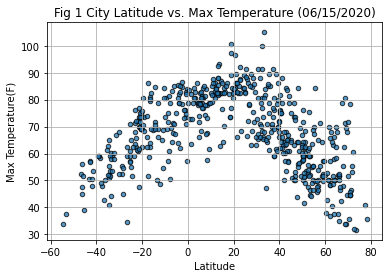

In [11]:
# generating a scatter plot from the cleaned datafra,e 
clean_city_data.plot("Latitude","Max Temp",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
# Coverting date format to m/d/y
converted_date= pd.to_datetime(clean_city_data.loc[0,"Date"],unit="s").strftime('%m/%d/%Y')
#Splitting the data formt to show only date
date_modified=str(converted_date).split()[0]
#styling the plot chart
plt.title(f"Fig 1 City Latitude vs. Max Temperature ({date_modified})")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid()
#Saving plot as "png"
plt.savefig("output_data/Fig1.png")
plt.show()

##### Analysis

The above code generates a scatter plot to see the relationship between latitude for both northern and southern hemispheres, and max temprature reported to date. It is clear to see two different correlation for latitudes greater than zero (negative) and those that are less than zero (positive).

## Latitude vs. Humidity Plot

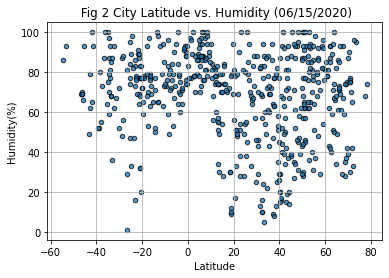

In [12]:
# Generating Scatter Plot
clean_city_data.plot("Latitude","Humidity",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
#Styling the chart
plt.title(f" Fig 2 City Latitude vs. Humidity ({date_modified})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid()
#Saving plot as "png" file
plt.savefig("output_data/Fig2.png")
plt.show()

##### Analysis

From the same dataframe and using pandas plotting function, a scatter plot between Humidity to date vs Latitude was generated. It's quite difficult to see a clear correlation, due that Humidity don't have a "direct" relationship with latitude, but more with current temperature and other factors. If we generate a chart of Humidity vs Max Temp, we will notice an inverse relationship.

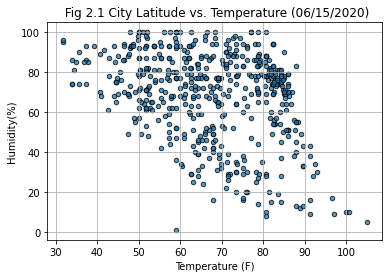

In [13]:
# Generating Scatter Plot
clean_city_data.plot("Max Temp","Humidity",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
#Styling the chart
plt.title(f" Fig 2.1 City Latitude vs. Temperature ({date_modified})")
plt.ylabel("Humidity(%)")
plt.xlabel("Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

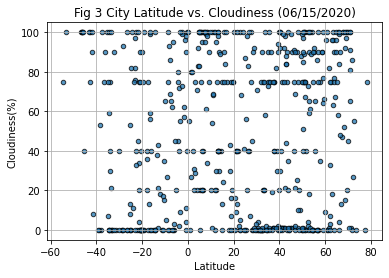

In [14]:
# Generating Scatter plot
clean_city_data.plot("Latitude","Cloudiness",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
plt.title(f"Fig 3 City Latitude vs. Cloudiness ({date_modified})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid()
#Saving chart as a "png" file
plt.savefig("output_data/Fig3.png")
plt.show()

##### Analysis

This Latitude vs Cloudiness plot was generated using pandas function; and again, this chart is not showing a clear correlation between variables. Without being a weather expert, I think that its better to analyze Cloudiness with Humidity,taking in count that clouds are created due to the water vapor condensation in the sky. This is like a correlation chain, due that meteorology factors are related to each other, but looking at specific correlations sometimes its not too clear.

## Latitude vs. Wind Speed Plot

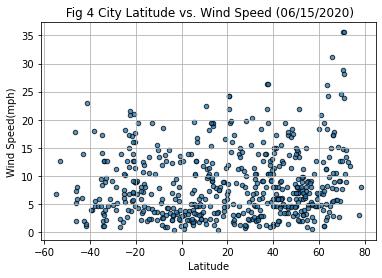

In [15]:
# Generating Scatter Plot
clean_city_data.plot("Latitude","Wind Speed",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
plt.title(f" Fig 4 City Latitude vs. Wind Speed ({date_modified})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid()
#Saving chart as "png" file
plt.savefig("output_data/Fig4.png")
plt.show()

##### Analysis

The above chart was also generated with pandas. The behaviour between Wind Speed and Latitude is quite constant for both hemispheres; the data is not showing a tendency or a relation between the independent and dependent variable. If a deeper anlysis is needed, it is necessary to include the altitude variable to this analysis, and to identify also which cities are closer to the sea. 

## Linear Regression

Northern and Southern Hemispheres were separated in order to identify a better regression model between correlated variables.

In [16]:
# because several regression are need, a python function was defined, in order to optimize the code
def regression(x,y):  
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values= x*slope+intercept
    line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    r_squared= rvalue**2
    return regress_values,line_eq,r_squared

In [17]:
# Separating Northern and Southern Hemisphere DataFrames

northern_hemisphere= clean_city_data.loc[clean_city_data["Latitude"]>=0]
southern_hemisphere= clean_city_data.loc[clean_city_data["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5140021525965867


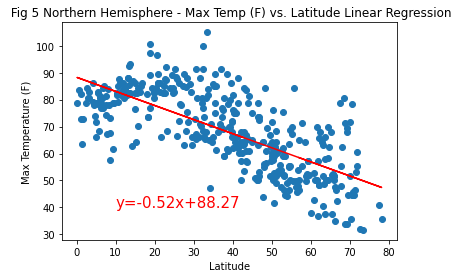

In [18]:
# Generating plot
# Returning regression fucntion
temp_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Max Temp"])
#Generating Scatter chart with pandas
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Max Temp"])
# Plotting the regression line
plt.plot(northern_hemisphere["Latitude"],temp_northern[0],"r-")
#Printing the line equation
plt.annotate(temp_northern[1],(10,40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(" Fig 5 Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression")
#Printing r-squared factor
print(f"The r-squared is : {temp_northern[2]}")
#saving plot as "png" file
plt.savefig("output_data/Fig5.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5201813209822466


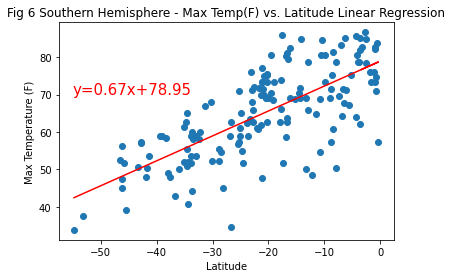

In [19]:
# Generating plot
# Returning regression fucntion
temp_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Max Temp"])
#Generating Scatter chart with pandas
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Max Temp"])
# Plotting the regression line
plt.plot(southern_hemisphere["Latitude"],temp_southern[0],"r-")
#Printing the line equation
plt.annotate(temp_southern[1],(-55,70), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Fig 6 Southern Hemisphere - Max Temp(F) vs. Latitude Linear Regression")
#Printing r-squared factor
print(f"The r-squared is : {temp_southern[2]}")
#saving plot as "png" file
plt.savefig("output_data/Fig6.png")
plt.show()

##### Southern & Northern Hemisphere - Max Temp vs. Latitude Linear Regression Analysis

Looking at the scatter plots its clear to see a negative and a positive correlation for the northen and southern hemispheres, respectively. For this analysis, the r-squared factor give us an intuition of how good is the regression model. In this case r-squared of around 0.6 (remember that cities are generated randomly, so this factor can change), represents that 60% of the variance of "Max Temperature" variable is explained by the independent variable, or by "Latitude" in this case. This regression model is not 100% predictable, and other factors has to be analyzed in order to improve it. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.009355699136453701


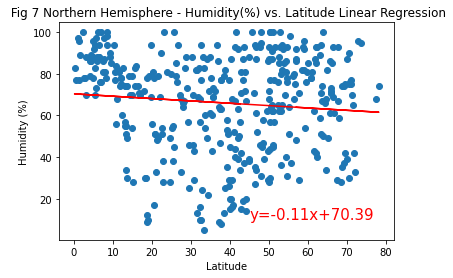

In [20]:
humidity_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])
plt.plot(northern_hemisphere["Latitude"],humidity_northern[0],"r-")
plt.annotate(humidity_northern[1],(45,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(" Fig 7 Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {humidity_northern[2]}")
plt.savefig("output_data/Fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0073761292033398245


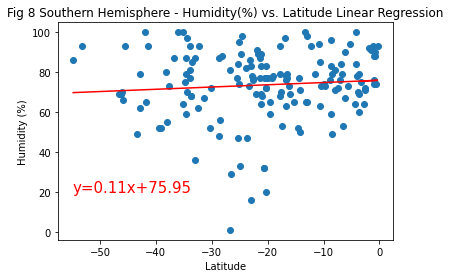

In [21]:
humidity_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Humidity"])
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Humidity"])
plt.plot(southern_hemisphere["Latitude"],humidity_southern[0],"r-")
plt.annotate(humidity_southern[1],(-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Fig 8 Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {humidity_southern[2]}")
plt.savefig("output_data/Fig8.png")
plt.show()

##### Southern & Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Analysis

Before to generate the regression, it was noticed that there is not a comprehensive relationship between humidity and latitude; and for this same reason, its not relevant to have a linear regression model. The r-squared factor in this case is approximately to zero, which means that almost nothing of the Humidity variation, it's explained by latitude.It is a big error if we used this model to make humidity predictions. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 4.8096343816958514e-05


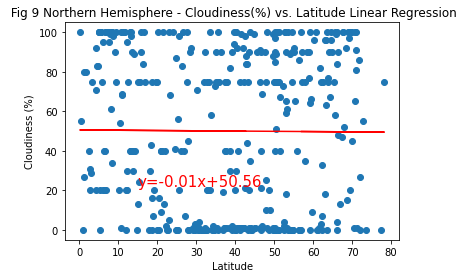

In [22]:
cloudiness_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Cloudiness"])
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Cloudiness"])
plt.plot(northern_hemisphere["Latitude"],cloudiness_northern[0],"r-")
plt.annotate(cloudiness_northern[1],(15,22), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(" Fig 9 Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {cloudiness_northern[2]}")
plt.savefig("output_data/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.01153307254390512


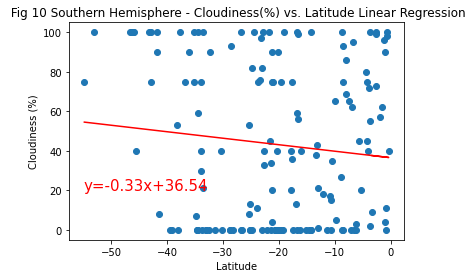

In [23]:
cloudiness_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Cloudiness"])
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Cloudiness"])
plt.plot(southern_hemisphere["Latitude"],cloudiness_southern[0],"r-")
plt.annotate(cloudiness_southern[1],(-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(" Fig 10 Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {cloudiness_southern[2]}")
plt.savefig("output_data/Fig10.png")
plt.show()

##### Southern & Northen Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Analysis

Again, since there is not a representative relation between Cloudiness and Latitude, its obvious that a regression model is not a good idea to describe the data and even to predict data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.026198843423274127


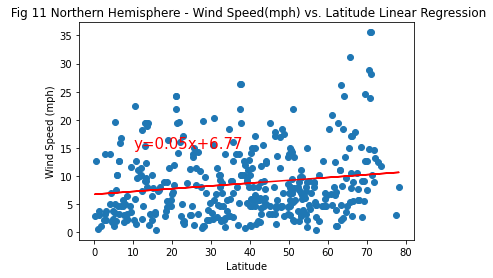

In [24]:
wind_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Wind Speed"])
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Wind Speed"])
plt.plot(northern_hemisphere["Latitude"],wind_northern[0],"r-")
plt.annotate(wind_northern[1],(10,15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(" Fig 11 Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
print(f"The r-squared is : {wind_northern[2]}")
plt.savefig("output_data/Fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.008784009174557027


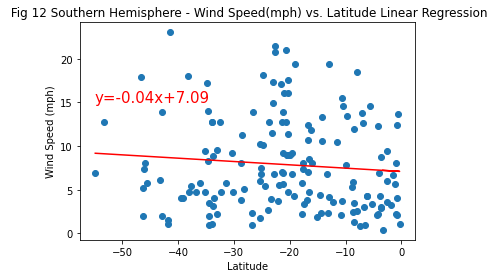

In [25]:
wind_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Wind Speed"])
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Wind Speed"])
plt.plot(southern_hemisphere["Latitude"],wind_southern[0],"r-")
plt.annotate(wind_southern[1],(-55,15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(" Fig 12 Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
print(f"The r-squared is : {wind_southern[2]}")
plt.savefig("output_data/Fig12.png")
plt.show()

##### Southern & Northen Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Analysis

For both hemispheres, Wind Speed and latitude doesn't has a specific trend, the linear regression model for both cases it's not a good representation of the data. More variables and more correlations need to be analyzed in order to generate a better model. 